In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\yahoo_stock.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [3]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [6]:
data.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Volume'] = data['Volume'].astype(float)
data.set_index('Date', inplace=True)

In [8]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [9]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

## Checking Seasonality

<Axes: xlabel='Date'>

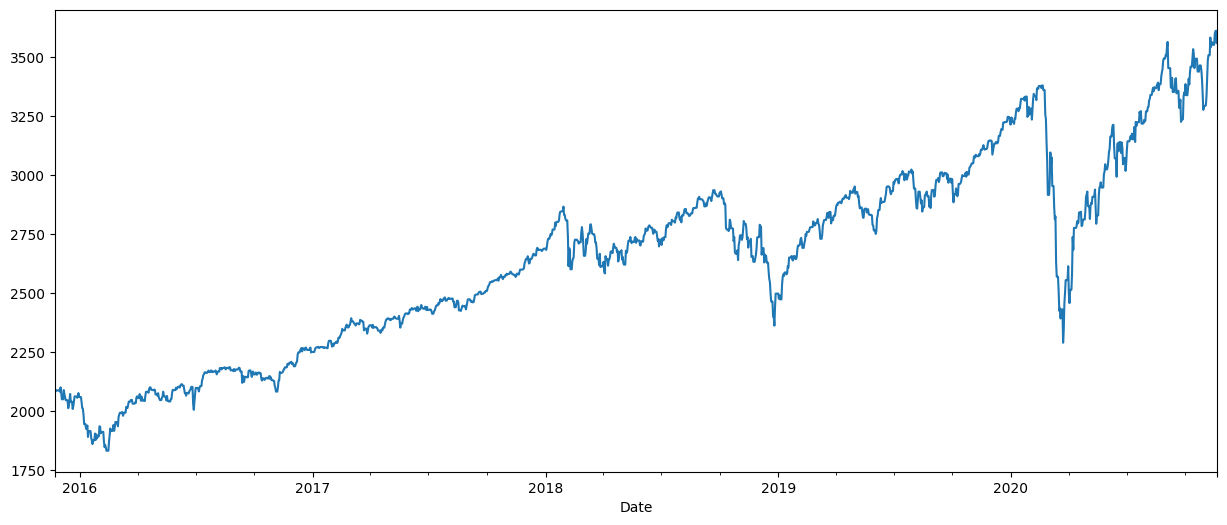

In [10]:
data['Open'].plot(figsize= (15,6))

<Axes: xlabel='Date'>

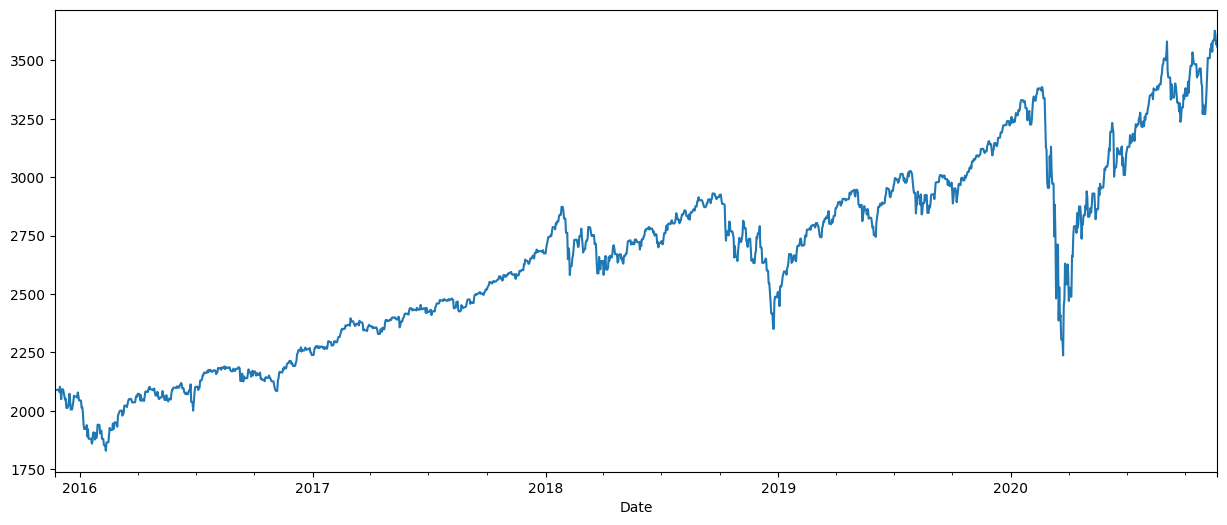

In [11]:
data['Close'].plot(figsize= (15,6))

<Axes: xlabel='Date'>

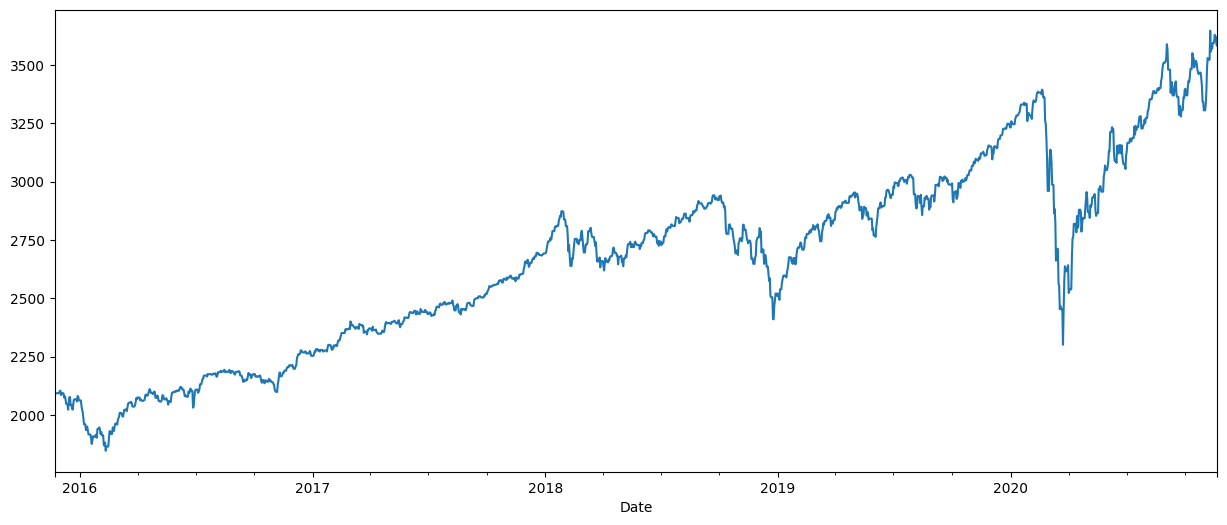

In [12]:
data['High'].plot(figsize= (15,6))

<Axes: xlabel='Date'>

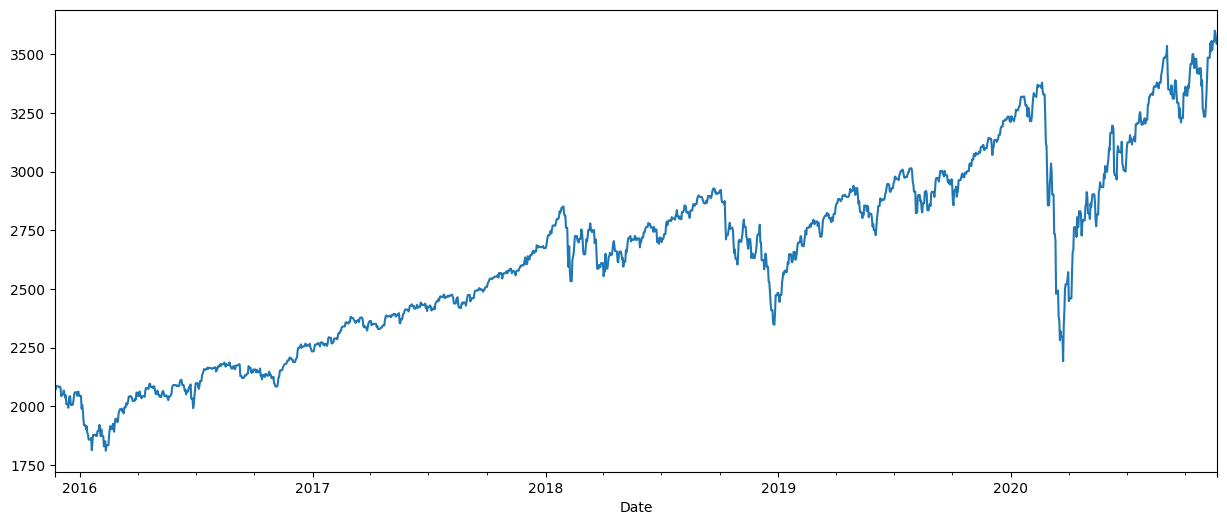

In [13]:
data['Low'].plot(figsize= (15,6))

## Rolling Forecast

In [14]:
Smoothened_data = data.rolling(window = 30).mean().dropna()
Smoothened_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-22,2073.186043,2046.206665,2061.955334,2058.191353,4.031615e+09,2058.191353
2015-12-23,2072.156706,2044.900334,2060.381669,2057.448018,4.028152e+09,2057.448018
2015-12-24,2071.264705,2044.514998,2059.685006,2056.509688,3.945717e+09,2056.509688
2015-12-25,2070.410042,2043.595996,2058.825671,2055.580351,3.897681e+09,2055.580351
2015-12-26,2069.555379,2042.676994,2057.966337,2054.651013,3.849645e+09,2054.651013
...,...,...,...,...,...,...
2020-11-16,3477.722648,3428.087996,3453.478988,3452.380298,4.683415e+09,3452.380298
2020-11-17,3481.300985,3431.695662,3457.372656,3456.570964,4.687538e+09,3456.570964
2020-11-18,3485.189990,3436.609001,3461.320329,3461.266634,4.727146e+09,3461.266634


<Axes: xlabel='Date'>

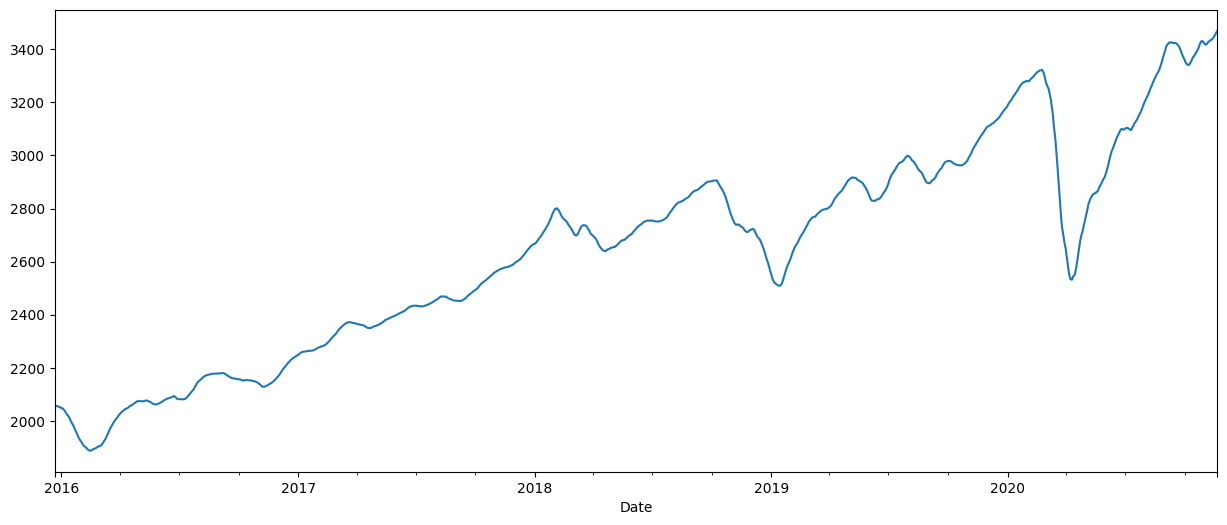

In [15]:
Smoothened_data['Close'].plot(figsize= (15,6))

# Training-Testing Splitting

In [16]:
train_size = int(len(data['Close']) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]


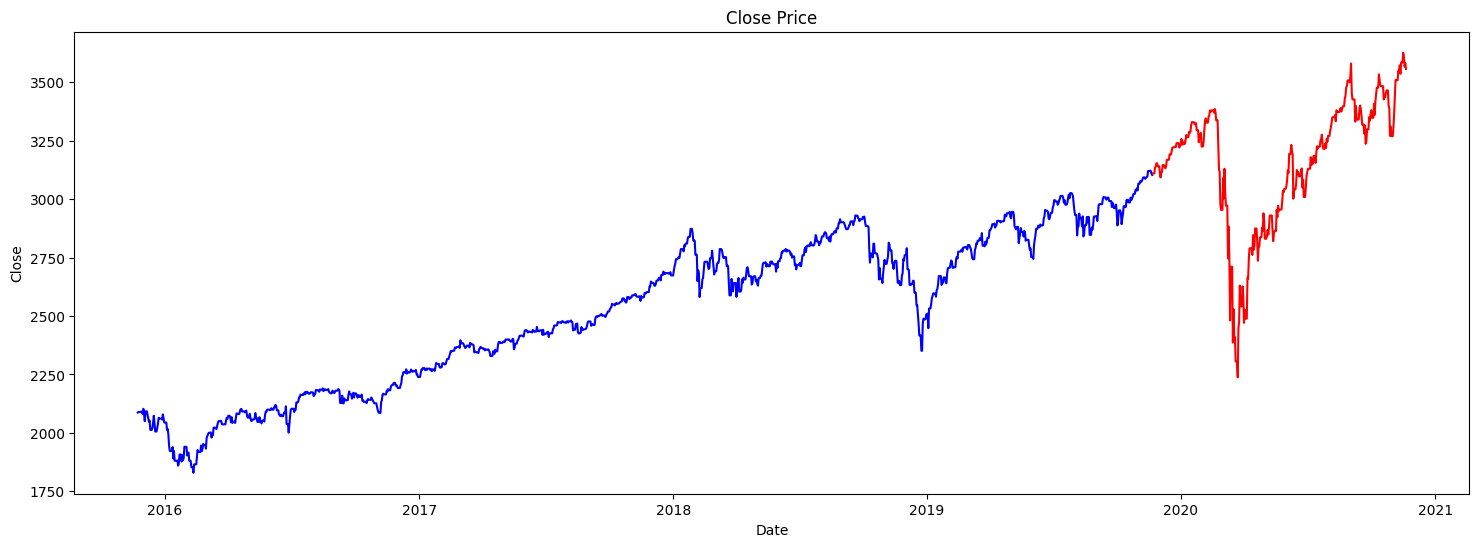

In [17]:
plt.figure(figsize=(18, 6))
plt.plot(train_data.index, train_data, label='Training', color='blue')
plt.plot(test_data.index, test_data, label='Testing', color='red')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

# ADFULLLER TEST

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
# Defined function for p-value
def adf_test(series):  
    result = adfuller(series)
    print('ADF STATS:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('REJECT NULL HYPOTHESIS ; No UNIT Root and is stationary')
    else:
        print('ACCEPT NULL HYPOTHESIS ; HAS UNIT ROOT and is not stationary')

In [20]:
adf_test(train_data)

ADF STATS:-0.6111865478506263
p-value: 0.8684342376948933
ACCEPT NULL HYPOTHESIS ; HAS UNIT ROOT and is not stationary


In [21]:
####NEED TO APPLY DIFFERENCING
differenced_train = train_data - train_data.shift(1)
differenced_train = differenced_train.dropna()

In [22]:
adf_test(differenced_train) ### d = 1

ADF STATS:-13.176955630647592
p-value: 1.2178151916343074e-24
REJECT NULL HYPOTHESIS ; No UNIT Root and is stationary


# ACF AND PACF PLOTS

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

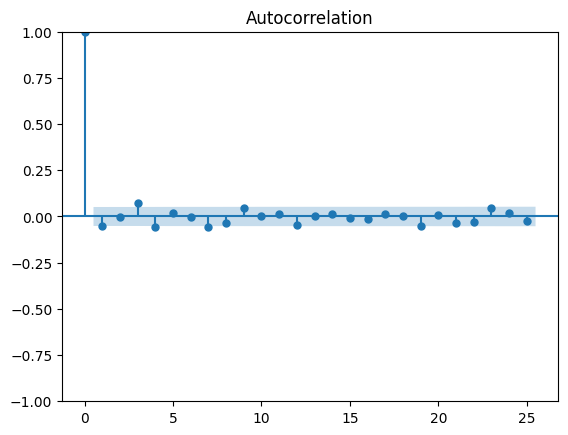

In [24]:
acf_plott = plot_acf(differenced_train,lags = 25) ###q=1

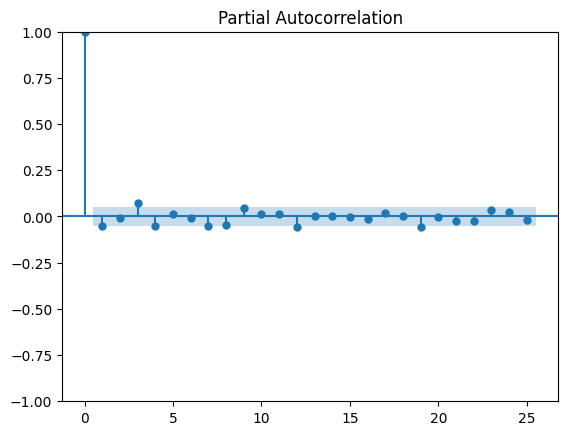

In [25]:
pacf_plott = plot_pacf(differenced_train,lags = 25) #####p = 1

# We have p = 1 , d = 1 ,q = 1

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,1)) # Fit (non-differenced) training data
model_fit = model.fit()
print(model_fit.summary())


C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1460
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6228.332
Date:                Fri, 20 Jun 2025   AIC                          12462.664
Time:                        13:23:05   BIC                          12478.521
Sample:                    11-23-2015   HQIC                         12468.579
                         - 11-21-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0327      0.398     -0.082      0.935      -0.813       0.747
ma.L1         -0.0185      0.399     -0.046      0.963      -0.800       0.763
sigma2       298.6839      5.107     58.483      0.0

In [27]:
forecast = model_fit.forecast(steps=len(test_data))
####forecasting the test data with it's length

## Forecasting Plot

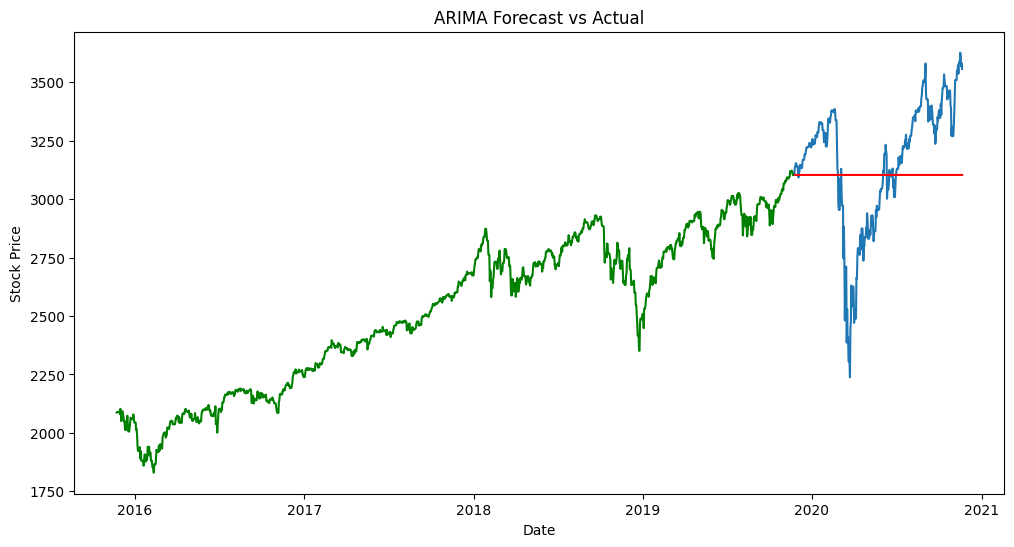

In [28]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.plot(train_data.index, train_data, label='Train', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA Forecast vs Actual') 
plt.show()

## Evaluation Metrics

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
r2 = r2_score(test_data, forecast)

print(mae,rmse,r2)

227.78612344088606 278.4383066213141 -0.044302277682350066
